In [1]:
import pandas as pd
import numpy as np

from salmon.triplets.offline import OfflineEmbedding
import targets

In [2]:
TODAY = "2021-04-16"
N_ANS = 2000
n = 30

df = pd.read_csv(f"io/{TODAY}/n={n}/responses.csv.zip")
X_train = df[["head", "winner", "loser"]].to_numpy()
X_train = X_train[:N_ANS]

T = targets.get(30)
_X_test = [
    [h_i, a_i, b_i] if abs(h - a) < abs(h - b) else [h_i, b_i, a_i]
    for h_i, h in enumerate(T)
    for a_i, a in enumerate(T)
    for b_i, b in enumerate(T)
    if h not in [a, b] and a != b
]
X_test = np.array(_X_test)

In [3]:
est = OfflineEmbedding(n=n, d=2, max_epochs=10_000_000)

In [4]:
est.fit(X_train, X_test)

{'module': <class 'salmon.triplets.samplers.adaptive._noise_models.CKL'>, 'module__n': 30, 'module__d': 2, 'module__random_state': None, 'optimizer': <class 'torch.optim.adadelta.Adadelta'>, 'max_epochs': 10000000}
<class 'torch.optim.adadelta.Adadelta'> {'dwell': 30}
{'ident': '', 'score_test': '0.499', 'train_data': 2000, 'max_epochs': 10000000, '_epochs': '1.024'}
{'ident': '', 'score_test': '0.779', 'train_data': 2000, 'max_epochs': 10000000, '_epochs': '1025.142'}
{'ident': '', 'score_test': '0.861', 'train_data': 2000, 'max_epochs': 10000000, '_epochs': '2049.552'}
{'ident': '', 'score_test': '0.911', 'train_data': 2000, 'max_epochs': 10000000, '_epochs': '3074.265'}
{'ident': '', 'score_test': '0.941', 'train_data': 2000, 'max_epochs': 10000000, '_epochs': '4099.268'}
{'ident': '', 'score_test': '0.950', 'train_data': 2000, 'max_epochs': 10000000, '_epochs': '5124.566'}
{'ident': '', 'score_test': '0.952', 'train_data': 2000, 'max_epochs': 10000000, '_epochs': '6150.172'}
{'iden

KeyboardInterrupt: 

(0.94, 1.0)

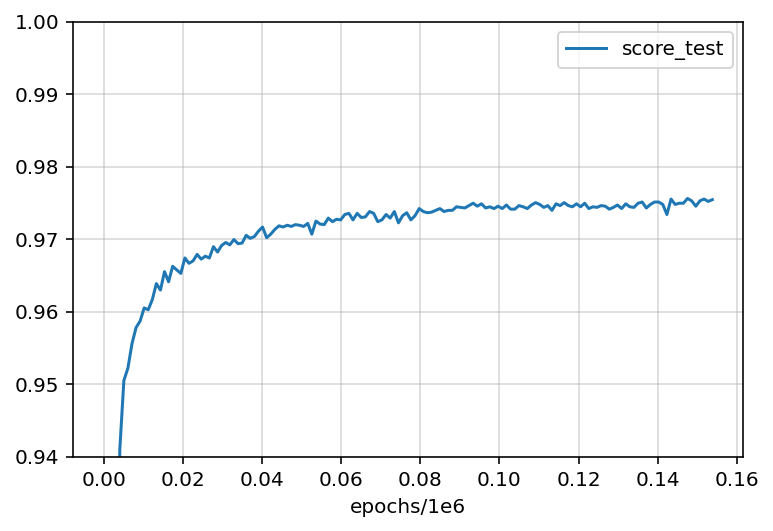

In [11]:
show = pd.DataFrame(est.history_)
show["epochs/1e6"] = show["_epochs"] / 1e6
ax = show.plot(x="epochs/1e6", y="score_test")
ax.grid(alpha=0.5)
ax.set_ylim(0.94, 1)